<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.
  - 인덱스를 초기화 합니다.

In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io
df = pd.read_csv(io.BytesIO(uploaded['서울시2.csv']))

Saving 서울시2.csv to 서울시2.csv


In [6]:
df = df.loc[:,['측정일시','측정소명','오존(ppm)']]
df_songp = df['측정소명'] == '송파구'
df = df[df_songp]
df.reset_index(drop=False, inplace=False)

,index,측정일시,측정소명,오존(ppm)
0,24,202003312300,송파구,0.020
1,49,202003312200,송파구,0.021
2,73,202003312100,송파구,0.025
3,99,202003312000,송파구,0.032
4,124,202003311900,송파구,0.034
...,...,...,...,...
739,18499,202003010400,송파구,0.002
740,18524,202003010300,송파구,0.002
741,18547,202003010200,송파구,0.002
742,18573,202003010100,송파구,0.002


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [7]:
import numpy as np
s1 = df.sample(n=20, random_state =42)
s2 = df.sample(n=200, random_state=42)

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [8]:
s1 = np.array(s1['오존(ppm)'])
s2 = np.array(s2['오존(ppm)'])
print(s1.mean())
print(s2.mean())

0.02175
0.02292


## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as st

a1 = s1.mean() - 1.96*(s1.std()/math.sqrt(20))
b1 = s1.mean() + 1.96*(s1.std()/math.sqrt(20))

print(a1)
print(b1)
CI1 = b1-a1
print("CI1 95% 신뢰구간: ", b1-a1)

a2 = s2.mean() - 1.96*(s2.std()/math.sqrt(200))
b2 = s2.mean() + 1.96*(s2.std()/math.sqrt(200))

print(a2)
print(b2)
CI2 = b2-a2
print("CI2 95% 신뢰구간: ", b2-a2)

#popmean = (s1.mean()+s2.mean())/2
#print(popmean)

0.01564423821296638
0.02785576178703362
CI1 95% 신뢰구간:  0.01221152357406724
0.02102287794045823
0.024817122059541768
CI2 95% 신뢰구간:  0.003794244119083537


## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






IndexError: ignored

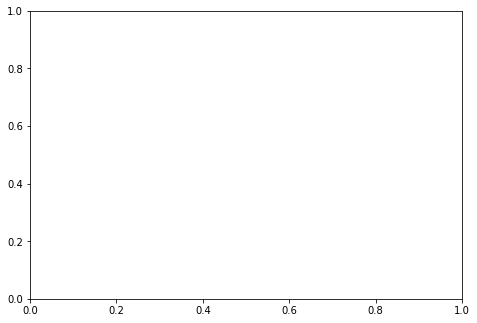

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


sample = ['s1', 's2']
pop_mean = np.mean(df['오존(ppm)'])

plt.bar(x='s1', height=s1.mean(), yerr=CI1[0]-s1.mean(), capsize=10)
plt.bar(x='s2', height=s2.mean(), yerr=CI2[0]-s2.mean(), capsize=10)
plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(s1.mean(), color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(s2.mean(), color = 'black', xmin = 0.65, xmax = 0.85)

plt.show() ###### 그래프작성 미숙 다시 재공부

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한정리를 구현하는 코드를 작성하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다